In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
proteins = ["PARP1", "UROK", "TRYB1"]
activity = ["decoys", "ligands"]

df = []
for protein in proteins:
    for active in activity:
        subset = pd.read_parquet(f"../grids/enrichment/{protein}/{active}.parquet")
        subset["active"] = activity.index(active)
        subset["protein"] = protein
        df.append(subset)
df = pd.concat(df).sort_values("scores")

In [3]:
palette = sns.color_palette("Spectral", 3)
sns.set_style("darkgrid", {"axes.facecolor": ".9"})

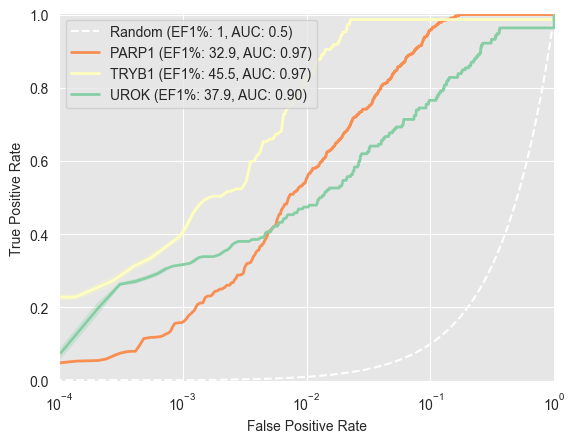

In [5]:
x = np.arange(0,1, 0.001)


plt.plot(x, x, c="w", ls="--", label=f"Random (EF1%: 1, AUC: 0.5)")

for i, (protein, subset) in enumerate(df.groupby("protein")):
    y = subset.active.cumsum()/subset.active.sum()
    decoys = (subset.active == 0)
    x = decoys.cumsum()/decoys.sum()
    top = int(subset.shape[0]/100)
    top_set = subset.head(top)
    EF1 = (top_set.active.sum()/top)/(subset.active.sum()/subset.shape[0])
    AUC = (y/y.shape[0]).sum()
    sns.lineplot(x=x, y=y, c=palette[i], lw=2, ls="-", label=f"{protein} (EF1%: {EF1:.1f}, AUC: {AUC:.2f})")

plt.xlim(0.0001,1.005)
plt.xscale("log")
plt.ylim(-0.005,1.005)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.savefig("../figures/roc.pdf")